In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Chandigarh.csv')

In [ ]:
df

,Date,Retail Price\n(RS/Qtl)
0,02-01-2021,4000
1,04-01-2021,5000
2,05-01-2021,4000
3,06-01-2021,4000
4,07-01-2021,4000
...,...,...
133,23-06-2021,2500
134,24-06-2021,2500
135,25-06-2021,2000
136,26-06-2021,3000


In [ ]:
'''from sklearn.preprocessing import LabelEncoder as LE
coder = LE()
df['Day']=coder.fit_transform(df['Day'])'''

"from sklearn.preprocessing import LabelEncoder as LE\ncoder = LE()\ndf['Day']=coder.fit_transform(df['Day'])"

In [ ]:
'''df['Input']=total
df'''

"df['Input']=total\ndf"

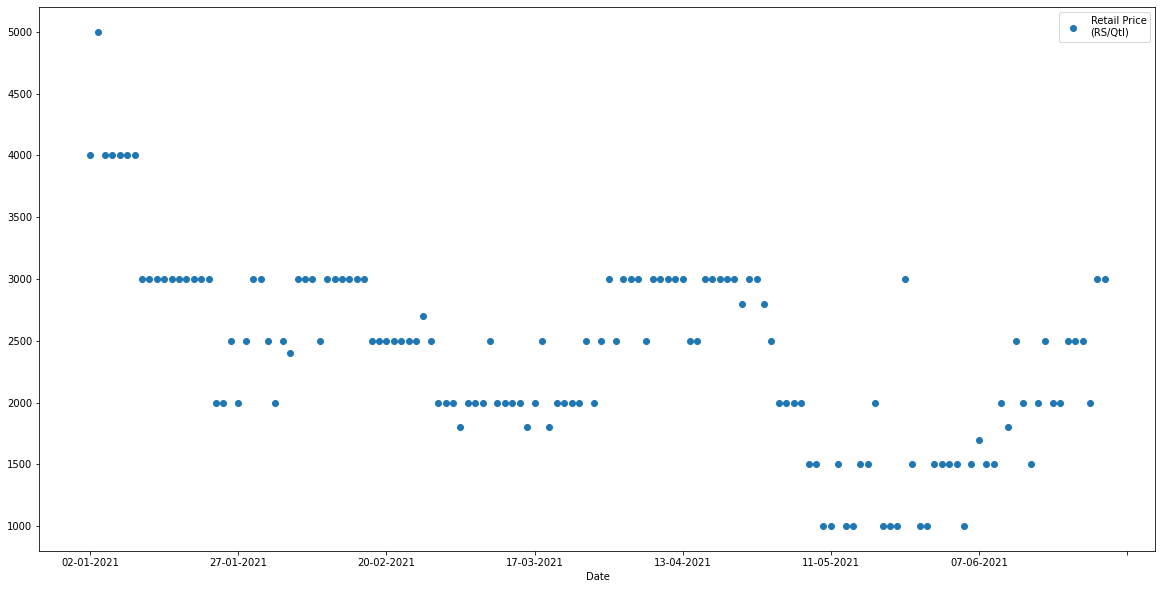

In [ ]:
df.plot(x='Date',y='Retail Price\n(RS/Qtl)',style='o',figsize=(20, 10))

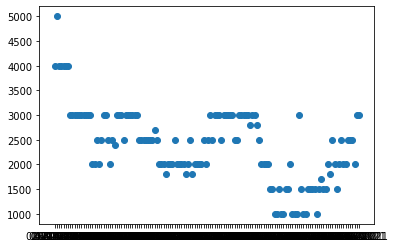

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Date'], df['Retail Price\n(RS/Qtl)'])
plt.show() # Depending on whether you use IPython

            Retail Price\n(RS/Qtl)
Date                              
02-01-2021                    4000
04-01-2021                    5000
05-01-2021                    4000
06-01-2021                    4000
07-01-2021                    4000


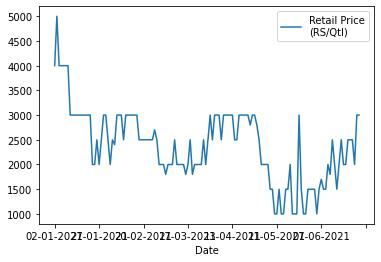

In [ ]:
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
print(series.head())
series.plot()

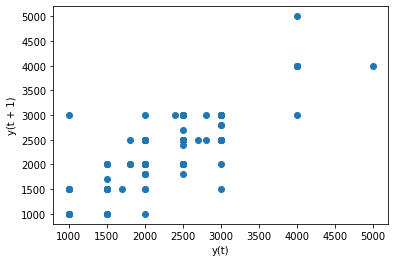

In [ ]:
from pandas.plotting import lag_plot
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
lag_plot(series)


In [ ]:
from pandas import concat
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
values = pd.DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't']
result = dataframe.corr()
print(result)

          t-1         t
t-1  1.000000  0.830336
t    0.830336  1.000000


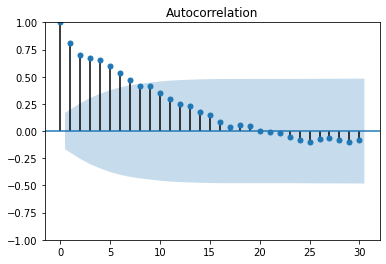

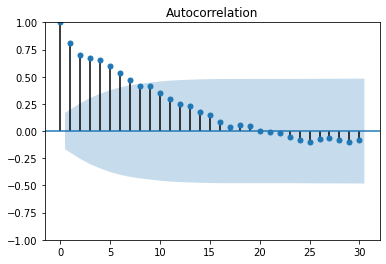

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
plot_acf(series, lags=30)

In [ ]:
pip install statsmodels --upgrade

Coefficients: [318.99093932   0.86378565]
predicted=1182.776594, actual=1000.000000
predicted=1340.656394, actual=1000.000000
predicted=1477.030701, actual=3000.000000
predicted=1594.828870, actual=1500.000000
predicted=1696.581239, actual=1000.000000
predicted=1784.473476, actual=1000.000000
predicted=1860.393529, actual=1500.000000
predicted=1925.972182, actual=1500.000000
predicted=1982.618082, actual=1500.000000
predicted=2031.547997, actual=1500.000000
predicted=2073.812956, actual=1000.000000
predicted=2110.320822, actual=1500.000000
predicted=2141.855792, actual=1700.000000
predicted=2169.095247, actual=1500.000000
predicted=2192.624298, actual=1500.000000
predicted=2212.948354, actual=2000.000000
predicted=2230.503982, actual=1800.000000
predicted=2245.668282, actual=2500.000000
predicted=2258.766987, actual=2000.000000
predicted=2270.081460, actual=1500.000000
predicted=2279.854740, actual=2000.000000
predicted=2288.296758, actual=2500.000000
predicted=2295.588853, actual=2000

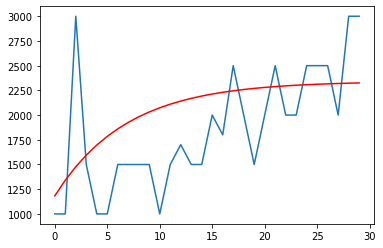

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[0:len(X)-30], X[len(X)-30:]
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: [ 9.87062065e+02  4.95420509e-01  1.60122184e-01  1.99240281e-01
 -4.34344223e-02  1.22759335e-02  8.43128732e-02  7.92944289e-02
 -1.74759449e-01  9.11204408e-02 -8.32810806e-02  9.45976064e-03
 -1.48849022e-01  1.44465068e-01 -1.58765529e-02 -8.11815730e-02
  7.03856591e-02 -2.05712321e-02  9.71219708e-02 -9.56395900e-02
 -1.86526460e-01  3.14154202e-02 -6.04595685e-03 -1.54082744e-01
  5.16636176e-02 -1.39570012e-01  1.04280441e-01 -1.45190685e-01
  1.44722639e-01  1.04391431e-01]
predicted=1450.456359, actual=1000.000000
predicted=1496.040383, actual=1000.000000
predicted=1350.906336, actual=3000.000000
predicted=1579.838508, actual=1500.000000
predicted=1725.304426, actual=1000.000000
predicted=1826.441791, actual=1000.000000
predicted=1947.666106, actual=1500.000000
predicted=2230.671158, actual=1500.000000
predicted=2169.328550, actual=1500.000000
predicted=2530.651060, actual=1500.000000
predicted=2757.846356, actual=1000.000000
predicted=3170.623417, actual=1500.

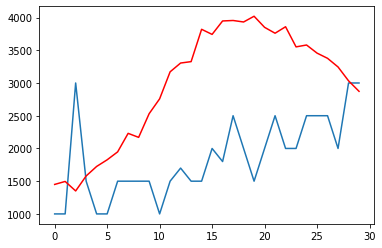

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[0:len(X)-30], X[len(X)-30:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ARIMA MODEL

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.4 MB/s 


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
n=len(df)
train=df[0:n-30]
test=df[n-30:n]

In [ ]:
stepwise_fit=auto_arima(train['Retail Price\n(RS/Qtl)'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1562.431, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1568.420, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1562.675, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1559.220, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1567.060, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1560.433, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1560.204, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1560.483, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1558.851, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1560.316, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1560.111, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1561.748, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1560.280, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.577 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -777.425
Date:                Fri, 29 Apr 2022   AIC                           1558.851
Time:                        14:57:30   BIC                           1564.197
Sample:                             0   HQIC                          1561.018
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3592      0.087     -4.117      0.000      -0.530      -0.188
sigma2      1.176e+05   1.39e+04      8.483      0.000    9.04e+04    1.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.93   Prob(JB):                         0.13
Heteroskedasticity (H):               0.63   Skew:                            -0.04
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Retail Price\n(RS/Qtl)'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.207439
p-value: 0.203557


In [ ]:
from pmdarima.arima.utils import ndiffs  
import pandas as pd 

adftest = ndiffs(df['Retail Price\n(RS/Qtl)'], test = 'adf')  

In [ ]:
# KPSS Test  
kpsstest = ndiffs(df['Retail Price\n(RS/Qtl)'], test = 'kpss')  
  
# PP Test  
pptest = ndiffs(df['Retail Price\n(RS/Qtl)'], test = 'pp')  
  
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest)  

ADF Test = 1
KPSS Test = 1
PP Test = 0


In [ ]:
import pandas
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline


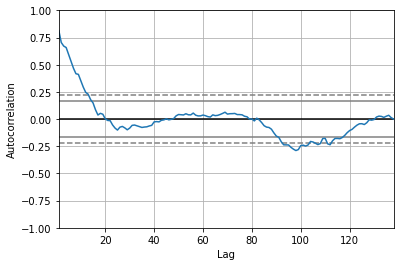

In [ ]:
autocorrelation_plot(df['Retail Price\n(RS/Qtl)'])
pyplot.show()

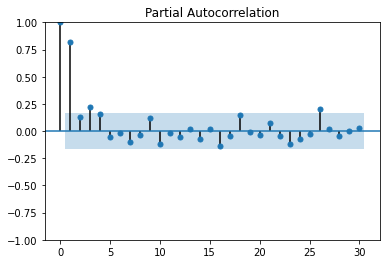

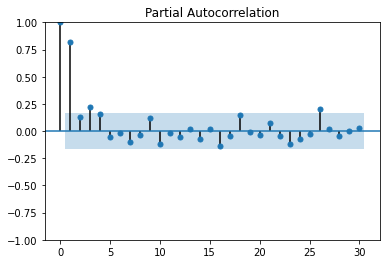

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
plot_pacf(series, lags=30)

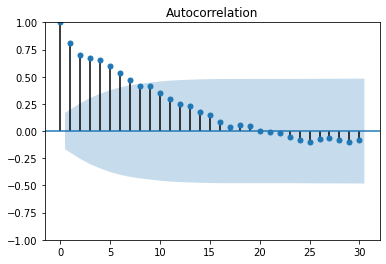

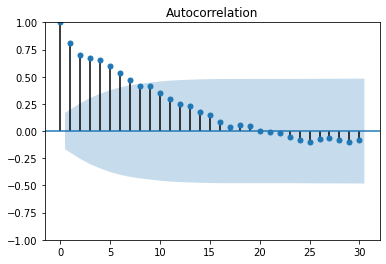

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv('/content/Chandigarh.csv', header=0, index_col=0)
plot_acf(series, lags=30)

In [ ]:
!python -m pip install statsmodels 

In [ ]:
model = ARIMA(train['Retail Price\n(RS/Qtl)'],order=(1,0,1))
model = model.fit()

In [ ]:
print(model.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Retail Price
(RS/Qtl)   No. Observations:                  108
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -784.372
Date:                   Fri, 29 Apr 2022   AIC                           1576.745
Time:                           14:59:59   BIC                           1587.473
Sample:                                0   HQIC                          1581.095
                                   - 108                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2533.4637    519.655      4.875      0.000    1514.958    3551.969
ar.L1          0.9690      0.024     40.844      0.000       0.922       1.015
ma.L1         -0.3398      0

In [ ]:
y_test=test['Retail Price\n(RS/Qtl)']

In [ ]:
start=len(train)
print(start)
end = len(train)+len(test)-1
print(end)
pred=model.predict(start=start,end=end,type='levels')

# pred.index=test['Date']

108
137


In [ ]:
pred

108    1335.066631
109    1372.264529
110    1408.307815
111    1443.232328
112    1477.072794
113    1509.862862
114    1541.635136
115    1572.421207
116    1602.251688
117    1631.156239
118    1659.163602
119    1686.301624
120    1712.597290
121    1738.076746
122    1762.765327
123    1786.687582
124    1809.867296
125    1832.327520
126    1854.090584
127    1875.178129
128    1895.611123
129    1915.409883
130    1934.594095
131    1953.182834
132    1971.194585
133    1988.647256
134    2005.558201
135    2021.944235
136    2037.821652
137    2053.206238
Name: predicted_mean, dtype: float64

In [ ]:
y_test

108    1000
109    1000
110    3000
111    1500
112    1000
113    1000
114    1500
115    1500
116    1500
117    1500
118    1000
119    1500
120    1700
121    1500
122    1500
123    2000
124    1800
125    2500
126    2000
127    1500
128    2000
129    2500
130    2000
131    2000
132    2500
133    2500
134    2500
135    2000
136    3000
137    3000
Name: Retail Price\n(RS/Qtl), dtype: int64

In [ ]:
y_test[136]

3000

In [ ]:
pred[108]

1335.066630728899

Predicted=1335.066630728899, Actual vALUES=1000
Predicted=1372.2645287469309, Actual vALUES=1000
Predicted=1408.307814809841, Actual vALUES=3000
Predicted=1443.2323277375074, Actual vALUES=1500
Predicted=1477.072793923244, Actual vALUES=1000
Predicted=1509.8628618631983, Actual vALUES=1000
Predicted=1541.6351356139653, Actual vALUES=1500
Predicted=1572.4212072116902, Actual vALUES=1500
Predicted=1602.251688084887, Actual vALUES=1500
Predicted=1631.1562394922166, Actual vALUES=1500
Predicted=1659.1636020154824, Actual vALUES=1000
Predicted=1686.3016241371715, Actual vALUES=1500
Predicted=1712.597289930961, Actual vALUES=1700
Predicted=1738.0767458927144, Actual vALUES=1500
Predicted=1762.7653269386547, Actual vALUES=1500
Predicted=1786.6875815965607, Actual vALUES=2000
Predicted=1809.8672964150355, Actual vALUES=1800
Predicted=1832.3275196151199, Actual vALUES=2500
Predicted=1854.0905840077642, Actual vALUES=2000
Predicted=1875.1781291999514, Actual vALUES=1500
Predicted=1895.6111231115

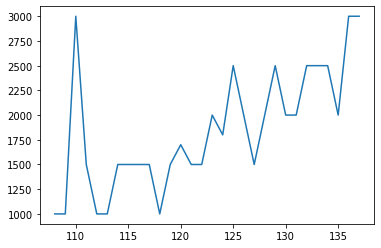

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in range(len(pred)):
	print('Predicted={}, Actual vALUES={}'.format(pred[i+108], y_test[i+108]))
rmse = sqrt(mean_squared_error(test['Retail Price\n(RS/Qtl)'], pred))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test['Retail Price\n(RS/Qtl)'])
#plt.plot(pred, color='red')
plt.show()

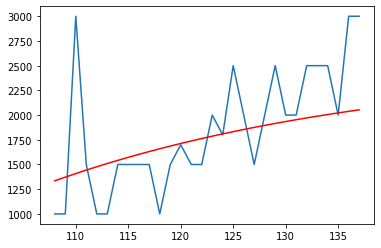

In [ ]:
pyplot.plot(y_test)
pyplot.plot(pred, color='red')
pyplot.show()